<a href="https://colab.research.google.com/github/Himanshu069/ML-mini-projects_learning/blob/main/student_data(supervised_and_Unsupervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("student_data.csv")
print(df.head())
print(len(df['Study Hours']),len(df['Attendance Rate']),len(df['Final Grade']),len(df['Group']))

   Study Hours  Attendance Rate  Final Grade    Group
0           10               85           78  Group 1
1           12               90           82  Group 1
2           15               92           88  Group 1
3            8               70           65  Group 2
4            7               68           60  Group 2
154 154 154 154


In [ ]:
group_mapping = {'Group 1': 1, 'Group 2': 2, 'Group 3': 3, 'Group 4': 4, 'Group 5': 5}

df["Group"] = df['Group'].map(group_mapping).astype(int)
print(df.head())


   Study Hours  Attendance Rate  Final Grade  Group
0           10               85           78      1
1           12               90           82      1
2           15               92           88      1
3            8               70           65      2
4            7               68           60      2


In [ ]:
x = df[['Study Hours','Attendance Rate']]
y = df['Final Grade']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
#print(y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("mean_squared error =",mse,"\nR2 error=",r2)

mean_squared error = 1.4796864858587524 
R2 error= 0.9924795659401199


In [ ]:
#plt.figure()
#plt.scatter(df['Study Hours'],df['Attendance Rate'],y_pred)

In [ ]:
#k-means clustering
kmeans=KMeans(5,random_state=11)
kmeans.fit(x)
df['cluster'] = kmeans.predict(x)
print("Cluster Centers Centroids:\n", kmeans.cluster_centers_)
print("\nCluster Labels in dataframe\n", df.head(20))
x_centroid=kmeans.cluster_centers_[:,0]
y_centroid=kmeans.cluster_centers_[:,1]
print(x_centroid)


Cluster Centers Centroids:
 [[ 5.45454545 57.27272727]
 [16.55769231 89.82692308]
 [ 8.13043478 70.04347826]
 [22.2972973  95.91891892]
 [11.90322581 81.5483871 ]]

Cluster Labels in dataframe
     Study Hours  Attendance Rate  Final Grade  Group  cluster
0            10               85           78      1        4
1            12               90           82      1        1
2            15               92           88      1        1
3             8               70           65      2        2
4             7               68           60      2        2
5             6               60           55      2        0
6            20               95           95      3        3
7            18               92           93      3        1
8            22               96           97      3        3
9            14               89           85      1        1
10           16               93           90      4        1
11           13               87           83      1        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


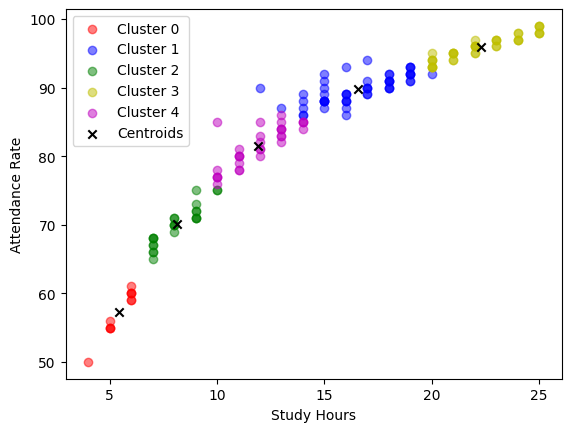

In [ ]:
#plt.figure()
df_0 = df[df['cluster'] == 0]
df_1 = df[df['cluster'] == 1]
df_2 = df[df['cluster'] == 2]
df_3 = df[df['cluster'] == 3]
df_4 = df[df['cluster'] == 4]

#print(df_4.head())
plt.scatter(df_0['Study Hours'],df_0['Attendance Rate'],label='Cluster 0',color='r',alpha=0.5,marker='o')
plt.scatter(df_1['Study Hours'],df_1['Attendance Rate'],label='Cluster 1',color='b',alpha=0.5,marker='o')
plt.scatter(df_2['Study Hours'],df_2['Attendance Rate'],label='Cluster 2',color='g',alpha=0.5,marker='o')
plt.scatter(df_3['Study Hours'],df_3['Attendance Rate'],label='Cluster 3',color='y',alpha=0.5,marker='o')
plt.scatter(df_4['Study Hours'],df_4['Attendance Rate'],label='Cluster 4',color='m',alpha=0.5,marker='o')
plt.scatter(x_centroid,y_centroid,label='Centroids',color='black',marker='x')
plt.xlabel('Study Hours')
plt.ylabel('Attendance Rate')
plt.legend()